### Contours in OpenCV

- cv2.findContours()
- cv2.drawContours()

#### countour
- Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. 
- The contours are a useful tool for shape analysis and object detection and recognition.

- For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
- findContours function modifies the source image. So if you want source image even after finding contours, already store it to some other variables.
- In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(<matplotlib.axes._subplots.AxesSubplot at 0x1edd95a5b70>,
 Text(0.5, 1.0, 'image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

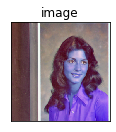

In [2]:
img=cv2.imread('standard_test_images\\standard_test_images\\1.tif')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(gray,127,255,0)
image, contours, hierarchy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.imshow('img',img)
cv2.imshow('thresh',thresh)

cv2.waitKey(0)
cv2.destroyAllWindows()
#cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
plt.subplot(221), plt.imshow(img),plt.title('image'),plt.xticks([]),plt.yticks([])
#plt.subplot(222), plt.imshow(thresh),plt.title('thresh'),plt.xticks([]),plt.yticks([])



#### draw the contours
- cv2.drawContours function is used
- It can also be used to draw any shape provided you have its boundary points

(<matplotlib.image.AxesImage at 0x1edd95a5c18>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

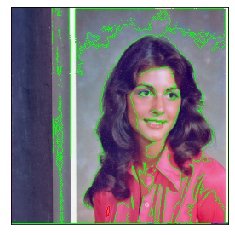

In [3]:
# To draw all contours in an image
imgc=cv2.drawContours(img,contours,-1,(0,255,0),1)
cv2.imshow('img_contours',imgc)

# to draw an individual contour
    # Two methods we have
img_parti=cv2.drawContours(img,contours,3,(0,255,0),1)
cv2.imshow('particular_contour',img_parti)

c=contours[4]
img_p=cv2.drawContours(img,[c],0,(0,0,255),1)
cv2.imshow('particular_contour_m',img_p)

cv2.waitKey(0)
cv2.destroyAllWindows()

imgc=cv2.cvtColor(imgc,cv2.COLOR_BGR2RGB)
img_parti=cv2.cvtColor(img_parti,cv2.COLOR_BGR2RGB)
img_p=cv2.cvtColor(img_p,cv2.COLOR_BGR2RGB)

plt.imshow(imgc),plt.xticks([]),plt.yticks([])


#### example for find and draw contours in an image

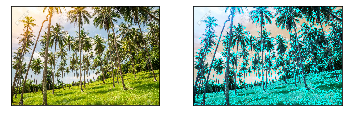

In [4]:
img=cv2.imread("standard_test_images\\standard_test_images\\green.jpg")
cv2.imshow('img',img)

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.subplot(221)
plt.imshow(img),plt.xticks([]),plt.yticks([])

ret,thresh=cv2.threshold(gray,127,255,0)
im,contours,hi=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
c=contours[4]
cv2.drawContours(img,contours,-1,(255,255,0),1)

img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.subplot(222)
plt.imshow(img),plt.xticks([]),plt.yticks([])
plt.show()



cv2.waitKey(0)
cv2.destroyAllWindows()


### Contour Approximation Method
- 3rd argument in cv2.findContours()
- contours are theboundaries of a shape with the same intensity
- It stores the (x,y) coordinates of the boundary of a shape. But does it store all the coordinates ? That is specified by this contour approximation method

- If you pass cv2.CHAIN_APPROX_NONE, all the boundary points are stored.

In [5]:
import cv2
img=cv2.imread("standard_test_images\\standard_test_images\\1.tif")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(gray,127,255,0)

In [6]:
im,c1,hi=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

len(c1)


171

In [7]:

im,c2,hi=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

len(c2)

171

In [8]:

im,c3,hi=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_TC89_L1)
len(c3)

171

In [9]:

im,c4,hi=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_TC89_KCOS)
len(c4)

171

### contour features
- features of contours like
    - area
    - perimeter
    - centroid
    - bounding box
    etc
- alot of functions related to conntours


#### moments

- image moments will help us to calculate some features like center of the object, area of the objetc etc..

In [10]:
img=cv2.imread("standard_test_images\\standard_test_images\\1.png")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(gray,127,255,0)
im,c1,hi=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cnt=c1[0]
m=cv2.moments(cnt)
print(m)
len(m)

{'m00': 10812.0, 'm10': 3023003.0, 'm01': 3181300.1666666665, 'm20': 849500866.3333333, 'm11': 882165320.5833333, 'm02': 1007492195.8333333, 'm30': 239926314823.90002, 'm21': 245963831187.88333, 'm12': 277191308013.8833, 'm03': 335086749358.15, 'mu20': 4278230.557436109, 'mu11': -7316731.556310892, 'mu02': 71433117.91681826, 'mu30': 16041512.03289795, 'mu21': 99953574.13330173, 'mu12': -194790010.68751526, 'mu03': -3392298957.4748535, 'nu20': 0.03659755830140594, 'nu11': -0.06259001381830588, 'nu02': 0.61106517344373, 'nu30': 0.0013197151697755872, 'nu21': 0.008223055768464056, 'nu12': -0.016025131016195276, 'nu03': -0.2790802005080511}


24

#### 1.centroid

- from this data we can extract usefull information like area, centroid etc..
- Centroid equation is
    - Cx=M10/M00
    - Cy=M01/M00
    

In [11]:
cx=int(m['m10']/m['m00'])
cy=int(m['m01']/m['m00'])
cx,cy

(279, 294)

#### 2.contour area


In [12]:
area=cv2.contourArea(cnt)
area


10812.0

#### 3.contour perimeter

- also called arc length.
- we can use function cv2.arcLength()
    - 1st argument is contours 0 th index values
    - 2nd argument specify whether shape is a closed contour(True) or just a cures(False)

In [13]:
perimeter=cv2.arcLength(cnt,True)
perimeter

838.3086559772491

#### 4.contour approximation

- It approximates a contour shape to another shape with less number of vertices depending upon the precision we specify.
- It is an implementation of Douglas-Peucker algorithm

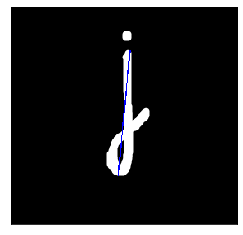

In [14]:
img=cv2.imread("standard_test_images\\standard_test_images\\1.png")
eps=0.1*cv2.arcLength(cnt,True)
approx=cv2.approxPolyDP(cnt,eps,True)
#approx=approx.reshape(-1,1,2)
cv2.polylines(img,[approx],True,(0,0,255),2)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(img),plt.xticks([]),plt.yticks([])
plt.show()

#### 5.Convex hull

- cv2.convexHull() function checks a curve for convexity defects and corrects it
- convexcurves are the curves which are always bulged out, or at-least flat. And if it is bulged inside, it is called convexity defects

hull = cv2.convexHull(points[, hull[, clockwise[, returnPoints]]

- points are the contours we pass into.
- hull is the output, normally we avoid it.
- clockwise : Orientation flag. If it is True, the output convex hull is oriented clockwise. Otherwise, it is oriented counter-clockwise.
- returnPoints : By default, True. Then it returns the coordinates of the hull points. If False, it returns the indices of contour points corresponding to the hull points.

hull = cv2.convexHull(cnt)

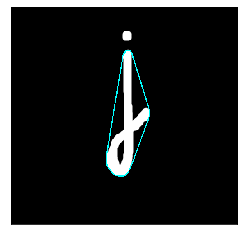

In [15]:
img=cv2.imread("standard_test_images\\standard_test_images\\1.png")
hull=cv2.convexHull(cnt)

hull=hull.reshape(-1,1,2)

cv2.polylines(img, [hull], True, (0,255,255),2)
cv2.imshow("img",img)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(img),plt.xticks([]),plt.yticks([])
plt.show()

#### 6.checking convexity

- we have a function to check if a curve is convex or not, cv2.isContourConvex()
- it will just returns True or False

In [16]:
cv2.isContourConvex(cnt)

False

#### 7.Bounding rectangle
- Two types of bounding rectangles
    1. straight bounding rectangle
    2. rotated rectangle

#### straight bounding rectangle
- It is a straight rectangle, it doesn’t consider the rotation of the object. So area of the bounding rectangle won’t be minimum. It is found by the function cv2.boundingRect().

(<matplotlib.image.AxesImage at 0x1eddcdc10f0>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

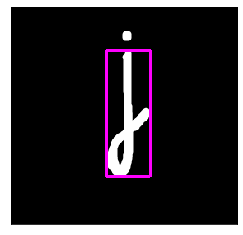

In [17]:
# straight bounding rectangle
img=cv2.imread("standard_test_images\\standard_test_images\\1.png")

x,y,w,h=cv2.boundingRect(cnt)
imgrect=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),5)

cv2.imshow("imgrectangle",imgrect)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(imgrect),plt.xticks([]),plt.yticks([])

#### Rotated Rectangle
- bounding rectangle is drawn with minimum area, so it considers the rotation also
- The function used is cv2.minAreaRect(). It returns a Box2D structure which contains following detals - ( top-left corner(x,y), (width, height), angle of rotation ).
- to draw this rectangle, we need 4 corners of the rectangle. It is obtained by the function cv2.boxPoints()

In [18]:
rect=cv2.minAreaRect(cnt)
rect

((293.76141357421875, 264.5184631347656),
 (307.6195373535156, 88.10212707519531),
 -80.61448669433594)

In [19]:
box=cv2.boxPoints(rect)
box

array([[312.14    , 423.45294 ],
       [225.21729 , 409.08557 ],
       [275.3828  , 105.583984],
       [362.30554 , 119.951355]], dtype=float32)

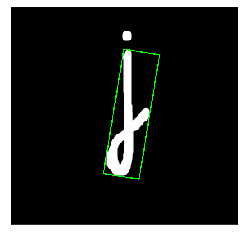

In [20]:
img=cv2.imread("standard_test_images\\standard_test_images\\1.png")
box=np.int0(box)
im=cv2.drawContours(img,[box],0,(0,255,0),2)
plt.imshow(im),plt.xticks([]),plt.yticks([])


cv2.imshow('im',im)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 8. Minimum enclosing circle
- it is a circle which completelycovers the object with minimum area

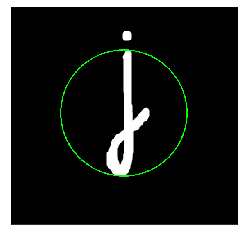

In [21]:
img=cv2.imread("standard_test_images\\standard_test_images\\1.png")
(x,y),radius=cv2.minEnclosingCircle(cnt)
center=(int(x),int(y))
radius=int(radius)
img_en=cv2.circle(img,center,radius,(0,255,0),2)

cv2.imshow('img_enclosed',img_en)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(img_en),plt.xticks([]),plt.yticks([])
plt.show()

#### 9.Fitting an ellips
- It returns the rotated rectangle in which the ellipse is inscribed.

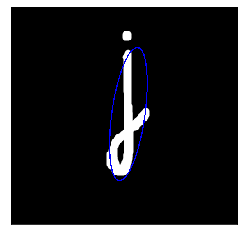

In [22]:
img=cv2.imread("standard_test_images\\standard_test_images\\1.png")
ellipse=cv2.fitEllipse(cnt)
img_elli=cv2.ellipse(img,ellipse,(0,0,255),2)
plt.imshow(img_elli),plt.xticks([]),plt.yticks([])
plt.show()

#### 10. Fitting a line
- image contains a set of white points. We can approximate a straight line to it.

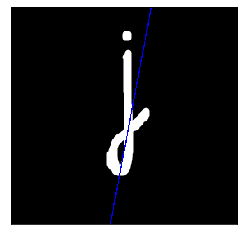

In [23]:
img=cv2.imread("standard_test_images\\standard_test_images\\1.png")

rows,cols=img.shape[:2]
[vx,vy,x,y]=cv2.fitLine(cnt,cv2.DIST_L2,0,0.01,0.01)
lefty=int((-x*vy/vx)+y)
righty=int(((cols-x)*vy/vx)+y)
cv2.line(img,(cols-1,righty),(0,lefty),(0,0,255),2)
plt.imshow(img),plt.xticks([]),plt.yticks([])
plt.show()

### contour properties


#### aspect ratio
- IT is the ratio of width to height of bounding rect of the object
- aspect ratio is width/height


In [24]:
x,y,w,h=cv2.boundingRect(cnt)
print("width is : ",w)
print("heigh is : ",h)
ratio=float(w/h)
ratio

width is :  106
heigh is :  308


0.34415584415584416

#### extent
- extent is the ratio of contour area to bounding rectangle area
- extent=(object area)/(rectnagle area)

In [25]:
area=cv2.contourArea(cnt)
print('contour area is',area)
rect_area=w*h
print('rectangle area is : ',rect_area)
extent=float(area/rect_area)

print('extent - ratio is ',extent)

contour area is 10812.0
rectangle area is :  32648
extent - ratio is  0.33116883116883117


#### solidity
- Solidity is the ratio of contour area to its convex hull area.
-  solidity = contpur area / convex hull area


In [26]:
area=cv2.contourArea(cnt)
hull=cv2.convexHull(cnt)
hull_area=cv2.contourArea(hull)
print("Contour area is ",area)
print("Convex hull area is ",hull_area)
solidity=float(area/hull_area)
print("Solidity is ",solidity)

Contour area is  10812.0
Convex hull area is  19135.0
Solidity is  0.5650378886856545


#### equivalent diameter


- it is the diameter of the circle whose area is same as the contour area
- equivalent diameter = sqrt(4*contourarea/pi)

In [27]:
eq_diameter=(4*area/np.pi)**0.5
equi_diameter=np.sqrt(4*area/np.pi)
equi_diameter

117.32973177194509

In [28]:
eq_diameter

117.32973177194509

#### orientation


- orientation is the angle at which object is directed

In [29]:
(x,y),(MA,ma),angle=cv2.fitEllipse(cnt)
print('angle is',angle)

angle is 7.909685134887695


#### mask and pixel points

In [30]:
img=cv2.imread("standard_test_images\\standard_test_images\\1.png")
mask=np.zeros(gray.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
pixelpoints=np.transpose(np.nonzero(mask))

pixel_points=cv2.findNonZero(mask)


- Numpy gives coordinates in (row, column) format,while OpenCV gives coordinates in (x,y) format. 
- So basically the answers will be interchanged. Note that, row = x and column = y

#### maximum value, minimum value and their locations
- we use a mask image

In [31]:
min_value,max_value,min_loc,max_loc=cv2.minMaxLoc(gray,mask=mask)
print("minimum value is ", min_value," and the location is ",min_loc)
print("maximum value is ",max_value," and the location is ",max_loc)


minimum value is  0.0  and the location is  (273, 330)
maximum value is  255.0  and the location is  (283, 108)


#### mean color or mean intensity


- we find the average color of an object. or it can be the average intensty of the object in a gray scale mode
- used mask

In [32]:
mean_value=cv2.mean(gray,mask=mask)
mean_value

(228.91440798858773, 0.0, 0.0, 0.0)

#### extreme points

- extreme points means topmost,bottommost,rightmost,leftmost points of the objects

In [33]:
left=tuple(cnt[cnt[:,:,0].argmin()][0])
right=tuple(cnt[cnt[:,:,0].argmax()][0])
top=tuple(cnt[cnt[:,:,1].argmin()][0])
bottom=tuple(cnt[cnt[:,:,1].argmax()][0])
left,right,top,bottom

((233, 362), (338, 267), (281, 108), (261, 415))

In [34]:
lrtp=np.array(((233, 362), (338, 267), (281, 108), (261, 415)))

In [35]:
lrtp

array([[233, 362],
       [338, 267],
       [281, 108],
       [261, 415]])

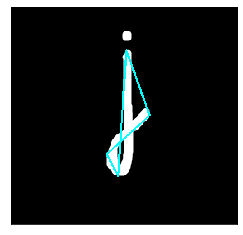

In [36]:
img=cv2.imread("standard_test_images\\standard_test_images\\1.png")
cv2.polylines(img,[lrtp],True,(0,255,255),3)

plt.imshow(img),plt.xticks([]),plt.yticks([])
plt.show()

### another example 

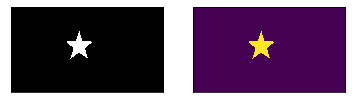

In [37]:
# a slight difference will appear in image their is no problem for contours. OpenCv in BGR form and maplotlib is in RGB form
img=cv2.imread('standard_test_images\\standard_test_images\\draw.png')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.subplot(221),plt.imshow(img),plt.xticks([]),plt.yticks([])
plt.subplot(222),plt.imshow(gray),plt.xticks([]),plt.yticks([])
plt.show()

In [38]:
ret,thresh=cv2.threshold(gray,127,255,0)
cv2.imshow('thresh',thresh)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [39]:
# find contours
thresh,contours,hi=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt=contours[0]


In [40]:
# draw contours
cv2.imshow('img',img)
cv2.drawContours(img,contours,-1,(0,255,0),2)
cv2.imshow('contours',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


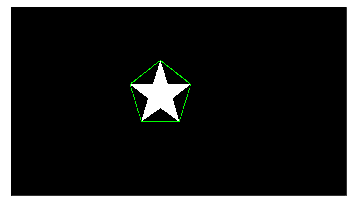

In [41]:
# convex hull
img=cv2.imread('standard_test_images\\standard_test_images\\draw.png')

cnt=contours[0]
hull=cv2.convexHull(cnt)

hull=hull.reshape(-1,1,2)
cv2.polylines(img,[hull],True,(0,255,0),2)

plt.imshow(img),plt.xticks([]),plt.yticks([])
plt.show()

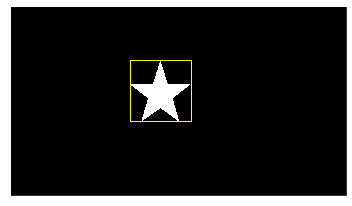

In [42]:
# draw rectangle over the shape
img=cv2.imread('standard_test_images\\standard_test_images\\draw.png')
x,y,w,h=cv2.boundingRect(cnt)
cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
plt.imshow(img),plt.xticks([]),plt.yticks([])
plt.show()

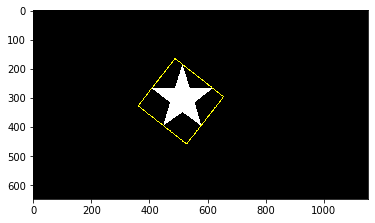

In [43]:
# rotated rectangle
img=cv2.imread('standard_test_images\\standard_test_images\\draw.png')
rect=cv2.minAreaRect(cnt)
rect=cv2.boxPoints(rect)
rect=np.int0(rect)
cv2.drawContours(img,[rect],0,(255,255,0),2)
plt.imshow(img)

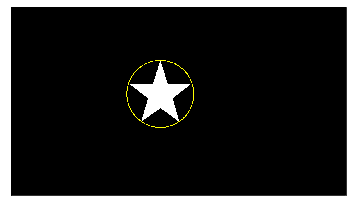

In [44]:
# circle
img=cv2.imread('standard_test_images\\standard_test_images\\draw.png')
(x,y),r=cv2.minEnclosingCircle(cnt)
center=(int(x),int(y))
r=int(r)
cv2.circle(img,center,r,(255,255,0),2)
plt.imshow(img),plt.xticks([]),plt.yticks([])
plt.show()

#### Convexity defects:
- Any deviation of the object from this hull can be considered as convexity defect.
- cv2.convexityDefects()
- we have to pass returnPoints = False while finding convex hull, in order to find convexity defects.
- It returns an array where each row contains these values - [ start point, end point, farthest point, approximate distance to farthest point ]. We can visualize it using an image.
- We draw a line joining start point and end point, then draw a circle at the farthest point.

In [45]:
hull=cv2.convexHull(cnt, returnPoints=False)
defects=cv2.convexityDefects(cnt, hull)
defects

array([[[  283,     0,   288, 12044]],

       [[    0,    55,    50, 11961]],

       [[   55,   131,    84, 11601]],

       [[  131,   206,   168, 11776]],

       [[  206,   283,   253, 11729]]], dtype=int32)

In [46]:
len(defects)

5

In [47]:
s,e,f,d=defects[0,0]
start=tuple(cnt[s][0])
end=tuple(cnt[e][0])
far=tuple(cnt[f][0])
start,end,far
cv2.line(img,start,end,[0,255,0],2)
cv2.circle(img,far,5,[0,0,255],-1)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

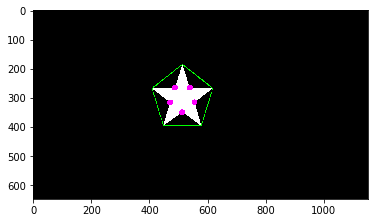

In [48]:
img=cv2.imread("standard_test_images\\standard_test_images\\draw.png")
for i in range(len(defects)):
    s,e,f,d=defects[i,0]
    start=tuple(cnt[s][0])
    end=tuple(cnt[e][0])
    far=tuple(cnt[f][0])
    start,end,far    
    cv2.line(img,start,end,[0,255,0],2)
    cv2.circle(img,far,10,[255,0,255],-1)
plt.imshow(img)
plt.show()

#### point polygone test
- finds the shortest distance between a point in the image and a contour. It returns the distance which is negative when point is outside the contour, positive when point is inside and zero if point is on the contour.
- third argument is measureDist. If it is True, it finds the signed distance. If False, it finds whether the point is inside or outside or on the contour (it returns +1, -1, 0 respectively).
- If you don’t want to find the distance, make sure third argument is False, because, it is a time consuming process. So, making it False gives about 2-3X speedup

In [49]:
dist=cv2.pointPolygonTest(cnt,(50,50),True)
dist

-420.0059523387734

In [50]:
dist=cv2.pointPolygonTest(cnt,(50,50),False)
dist

-1.0

#### Match shapes
- which enables us to compare two shapes, or two contours and returns a metric showing the similarity.
- The lower the result, the better match it is. It is calculated based on the hu-moment values.

In [1]:
import cv2

img1=cv2.imread("standard_test_images\\standard_test_images\\1.tif",0)
img2=cv2.imread("standard_test_images\\standard_test_images\\1.tif",0)
#img3=cv2.imread("standard_test_images\\standard_test_images\\draw.png")


In [2]:
ret,thresh1=cv2.threshold(img1,127,255,0)
ret,thresh2=cv2.threshold(img2,127,255,0)
contours,hie=cv2.findContours(thresh1,2,1)
cnt1=contours[0]
contours,hie=cv2.findCountours(thresh2,2,1)
cnt2=countours[0]

ret=cv2.matchShapes(cnt1,cnt2,1,0.0)
print(ret)

ValueError: too many values to unpack (expected 2)

In [3]:
cv2.HuMoments(img1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

To find contours in an image using cv2.findContours() function, we passed an argument Contour Retrieval Mode.

We usually passed cv2.RETR_LIST or cv2.RETR_TREE

In [5]:
img=cv2.imread("standard_test_images\\standard_test_images\\1.tif",0)
ret,thresh=cv2.threshold(img,127,255,0)
img,cnt,hei=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

In output we got 3 arrays
1. image
2. Contour
3. hierarchy

First two we already know..

Now we will learn about Hierarchy



#### Hierarchy:

- cv2.findContours() function used to detect objects in an image.
- Sometimes objects are in different locations. but in some cases some shapes are in inside other shapes(nested fig)

    - in this case, we caxll out4er one as parent and inner one as child.
    - contours in image has some relationship to each other and we can specify how one contour is connected to each other, like is it child of some other contour, or is it parent etc...
    
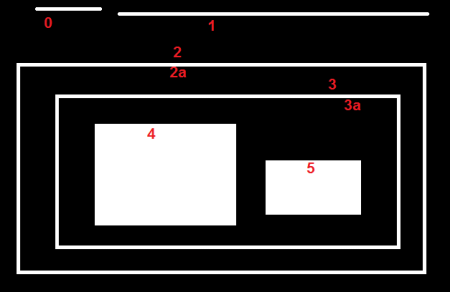

#### RETR_LIST

- simolest of four flags
- It simply retrieves all the contours, but doesnot create any parent-child relationship.

- parents and kids are equal under this rule and they are just contours(they are all belongs to same hierarchy level

- so here, 3rd and 4th terms in hierarchy are always -1.


In [9]:
img=cv2.imread("standard_test_images\\standard_test_images\\heira.png",0)
ret,thresh=cv2.threshold(img,127,255,0)
img,cnt,hei=cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
print(hei)

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [-1  6 -1 -1]]]


#### RETR_EXTERNAL:
- It returns only extreme outer flags
- all child contours are left behind.
- we can say, under this law, only the eldest in every family is taken care of.It doesn't care about other members of the family

In [11]:
img,cnt,hei=cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
print(hei)

[[[ 1 -1 -1 -1]
  [-1  0 -1 -1]]]


#### RETR_CCOMP:
- This flag retrieves all the contours and arranges them to a 2-level hierarchy.

i.e. external contours of the object are places in hierarchy 1

    contours of holes inside object is placed in hierarchy 2
    
    if any object inside it , its contou is placed again in hierarchy 1 only and its hole in hierarchy 2

In [12]:
img,cnt,hei=cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
print(hei)

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 5  1  3 -1]
  [ 4 -1 -1  2]
  [-1  3 -1  2]
  [ 7  2  6 -1]
  [-1 -1 -1  5]
  [-1  5 -1 -1]]]


#### RETR_TREE:
- This is Mr.Perfect
- It retrieves all the contours and create a full family hierarchy list
- It even tells, who is the grandpa, father, son, grandson and even beyond

In [10]:

img,cnt,hei=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
hei

array([[[ 7, -1,  1, -1],
        [-1, -1,  2,  0],
        [ 3, -1, -1,  1],
        [ 4,  2, -1,  1],
        [-1,  3,  5,  1],
        [ 6, -1, -1,  4],
        [-1,  5, -1,  4],
        [-1,  0, -1, -1]]], dtype=int32)